<a href="https://colab.research.google.com/github/erbisti/Collab/blob/main/perceptron_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron (binário) — Notebook para Colab

**Objetivo:** executar o Perceptron e explicar, em etapas, a classe, seus métodos, o treinamento e os parâmetros.


## 1) Execução direta

Execute a célula de código abaixo para:
- Definir a classe `Perceptron` e a função `confusion_matrix_binary`;
- Treinar no conjunto de portas AND, NOT AND, OR, NOR, XOR ;
- Exibir logs por época, acurácia final e matriz de confusão (via **print**);
- Plotar curvas de aprendizado (erros/acurácia) e a fronteira de decisão.



Epoch  1/20 | errors= 3 | acc=0.500 | w=[-0.08309474 -0.00465937] | b=-0.100
Epoch  2/20 | errors= 3 | acc=0.500 | w=[0.01690526 0.09534063] | b=0.000
Epoch  3/20 | errors= 3 | acc=0.500 | w=[ 0.01690526 -0.00465937] | b=-0.100
Epoch  4/20 | errors= 2 | acc=0.500 | w=[-0.08309474 -0.00465937] | b=-0.100
Epoch  5/20 | errors= 4 | acc=0.500 | w=[-0.08309474 -0.00465937] | b=-0.100
Epoch  6/20 | errors= 4 | acc=0.500 | w=[-0.08309474 -0.00465937] | b=-0.100
Epoch  7/20 | errors= 4 | acc=0.500 | w=[-0.08309474 -0.00465937] | b=-0.100
Epoch  8/20 | errors= 4 | acc=0.500 | w=[-0.08309474 -0.00465937] | b=-0.100
Epoch  9/20 | errors= 4 | acc=0.500 | w=[-0.08309474 -0.00465937] | b=-0.100
Epoch 10/20 | errors= 3 | acc=0.500 | w=[0.01690526 0.09534063] | b=0.000
Epoch 11/20 | errors= 3 | acc=0.500 | w=[ 0.01690526 -0.00465937] | b=-0.100
Epoch 12/20 | errors= 1 | acc=0.500 | w=[0.01690526 0.09534063] | b=0.000
Epoch 13/20 | errors= 2 | acc=0.500 | w=[-0.08309474 -0.00465937] | b=-0.200
Epoch 14

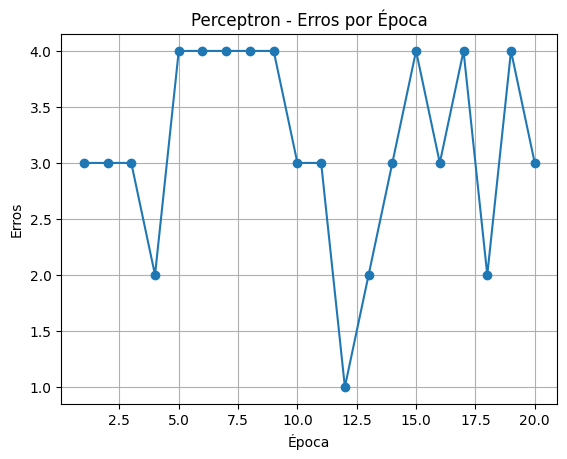

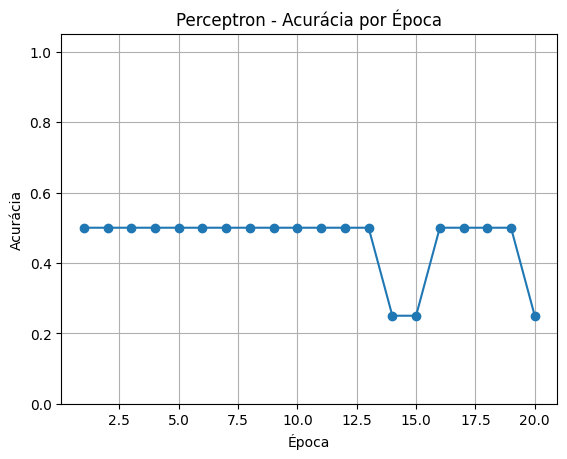

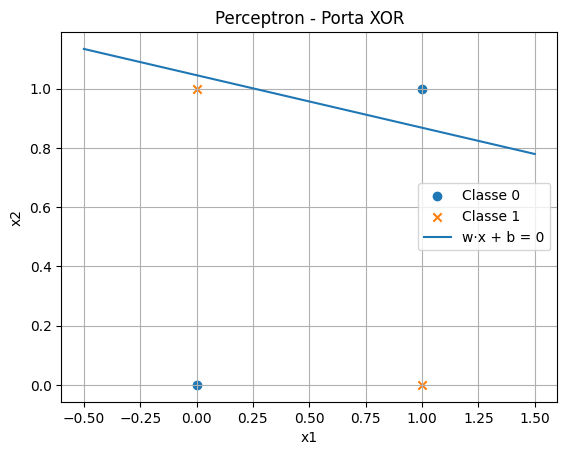

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

class Perceptron:
    def __init__(self, lr=0.1, n_iter=10,
                 random_init=False, shuffle_data=False, step_when_zero=1,
                 random_state=None, early_stopping=True, verbose=True):
        self.lr = lr
        self.n_iter = n_iter
        self.random_init = random_init
        self.shuffle_data = shuffle_data
        self.step_when_zero = step_when_zero
        self.random_state = random_state
        self.early_stopping = early_stopping
        self.verbose = verbose

        self.w = None
        self.b = None
        self.history_ = {
            "epoch": [], "errors": [], "accuracy": [],
            "w": [], "b": []
        }

        if self.random_state is not None:
            np.random.seed(self.random_state)

    def step_function(self, x):
        if x > 0: return 1
        if x < 0: return 0
        return self.step_when_zero

    def predict(self, X):
        X = np.asarray(X)
        return np.array([self.step_function(np.dot(xi, self.w) + self.b) for xi in X])

    def score(self, X, y):
        y_pred = self.predict(X)
        return (y_pred == y).mean()

    def fit(self, X, y):
        X = np.asarray(X); y = np.asarray(y)
        n_amostras, n_features = X.shape

        if self.random_init:
            self.w = np.random.randn(n_features) * 0.01
            self.b = np.random.randn() * 0.01
        else:
            self.w = np.zeros(n_features)
            self.b = 0.0

        for epoch in range(1, self.n_iter + 1):
            errors = 0

            if self.shuffle_data:
                indices = np.arange(n_amostras)
                np.random.shuffle(indices)
            else:
                indices = range(n_amostras)

            for i in indices:
                xi, target = X[i], y[i]
                net_input = np.dot(xi, self.w) + self.b
                y_pred = self.step_function(net_input)
                update = self.lr * (target - y_pred)
                if update != 0.0:
                    self.w += update * xi
                    self.b += update
                    errors += 1

            acc = self.score(X, y)

            # Log da época
            self.history_["epoch"].append(epoch)
            self.history_["errors"].append(errors)
            self.history_["accuracy"].append(acc)
            self.history_["w"].append(self.w.copy())
            self.history_["b"].append(float(self.b))

            if self.verbose:
                print(f"Epoch {epoch:2d}/{self.n_iter} | "
                      f"errors={errors:2d} | acc={acc:.3f} | w={self.w} | b={self.b:.3f}")

            # Parada antecipada: sem erros => hiperplano separou perfeitamente
            if self.early_stopping and errors == 0:
                if self.verbose:
                    print(f"Early stopping na época {epoch} (0 erros).")
                break

        return self

    def plot_learning_curves(self):
        if not self.history_["epoch"]:
            print("Nada para plotar. Treine antes.")
            return
        # Erros por época
        plt.figure()
        plt.plot(self.history_["epoch"], self.history_["errors"], marker='o')
        plt.xlabel("Época"); plt.ylabel("Erros"); plt.title("Perceptron - Erros por Época")
        plt.grid(True)
        # Acurácia por época
        plt.figure()
        plt.plot(self.history_["epoch"], self.history_["accuracy"], marker='o')
        plt.xlabel("Época"); plt.ylabel("Acurácia"); plt.title("Perceptron - Acurácia por Época")
        plt.ylim(0, 1.05); plt.grid(True)
        plt.show()

    def plot_decision_boundary(self, X, y, title="Fronteira de decisão"):
        X = np.asarray(X); y = np.asarray(y)
        plt.figure()
        plt.scatter(X[y==0,0], X[y==0,1], marker='o', label='Classe 0')
        plt.scatter(X[y==1,0], X[y==1,1], marker='x', label='Classe 1')
        w1, w2 = self.w[0], self.w[1]; b = self.b
        x1_vals = np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 100)
        if abs(w2) > 1e-12:
            x2_vals = -(b + w1*x1_vals)/w2
            plt.plot(x1_vals, x2_vals, label='w·x + b = 0')
        else:
            if abs(w1) > 1e-12:
                x_vert = -b / w1
                plt.axvline(x=x_vert, label='w·x + b = 0')
        plt.xlabel("x1"); plt.ylabel("x2"); plt.title(title)
        plt.legend(); plt.grid(True); plt.show()

def confusion_matrix_binary(y_true, y_pred):
    y_true = np.asarray(y_true); y_pred = np.asarray(y_pred)
    tn = np.sum((y_true==0)&(y_pred==0))
    fp = np.sum((y_true==0)&(y_pred==1))
    fn = np.sum((y_true==1)&(y_pred==0))
    tp = np.sum((y_true==1)&(y_pred==1))
    return np.array([[tn, fp],[fn, tp]])

# ----------------------------------------------------------------
# Exemplo com a porta lógica AND, com logs/curvas/métricas
# ----------------------------------------------------------------
if __name__ == "__main__":
    # Definições de portas lógicas
    truth_tables = {
        "AND":     np.array([0,0,0,1]),
        "OR":      np.array([0,1,1,1]),
        "NAND":    np.array([1,1,1,0]),
        "NOR":     np.array([1,0,0,0]),
        "XOR":     np.array([0,1,1,0]),
    }

    # Conjunto de entradas sempre o mesmo (todas combinações de 2 bits)
    X = np.array([[0,0],[0,1],[1,0],[1,1]])

    # Escolha a porta desejada
    gate = "XOR"   # mude para "OR", "NAND", "NOR"
    y = truth_tables[gate]

    clf = Perceptron(
        lr=0.1, n_iter=20,
        random_init=True, shuffle_data=True,
        step_when_zero=0,
        random_state=7, early_stopping=True, verbose=True
    ).fit(X, y)

    y_pred = clf.predict(X)
    acc_final = clf.score(X, y)
    cm = confusion_matrix_binary(y, y_pred)

    print(f"\nPorta lógica: {gate}")
    print("Predições:", y_pred)
    print("Rótulos:  ", y)
    print(f"Acurácia final: {acc_final:.3f}")
    print("Matriz de confusão (tn fp / fn tp):\n", cm)

    clf.plot_learning_curves()
    clf.plot_decision_boundary(X, y, title=f"Perceptron - Porta {gate}")



## 2) Estrutura da classe e dos parâmetros

**`__init__` (construtor):**
- `lr`: taxa de aprendizado.
- `n_iter`: épocas (passagens completas no conjunto).
- `random_init`: pesos/bias aleatórios (Normal pequena) ou zeros.
- `shuffle_data`: embaralhar amostras a cada época.
- `step_when_zero`: valor retornado quando \( w\cdot x + b = 0 \) (0 ou 1).
- `random_state`: semente para reprodutibilidade.
- `early_stopping`: para quando não houver erros na época.
- `verbose`: imprime logs por época.

Atributos criados em tempo de execução:
- `w`, `b`: pesos e viés.
- `history_`: dicionário com epoch, errors, accuracy, w, b.

## 3) Métodos principais
- `step_function(z)`: função degrau (0/1), com controle no zero.
- `predict(X)`: aplica \( y=\text{step}(w\cdot x + b) \) ponto a ponto.
- `score(X, y)`: acurácia média `(y_pred == y).mean()`.
- `fit(X, y)`: treinamento com a regra do Perceptron; registra histórico e aplica **early stopping** quando não há erros.
- `plot_learning_curves()`: plota erros e acurácia por época.
- `plot_decision_boundary(X, y)`: plota dados 2D e a fronteira \( w\cdot x + b = 0 \).

Função auxiliar:
- `confusion_matrix_binary(y_true, y_pred)`: retorna matriz `[[tn, fp],[fn, tp]]`.

## 4) Conjunto de treino e ordem
O conjunto AND é **explicitado** nesta ordem:

```
X = [[0,0], [0,1], [1,0], [1,1]]
y = [0,    0,     0,     1]
```

- Com `shuffle_data=False`, essa ordem é mantida em cada época.
- Com `shuffle_data=True`, a ordem é **embaralhada** a cada época (usando `np.random.shuffle`).
- `random_state` controla a semente do NumPy e torna o processo **reprodutível** quando desejado.

## 5) Saídas e gráficos
- Logs por época: `errors`, `acc`, `w`, `b`.
- Impressões finais: predições, rótulos, acurácia, **matriz de confusão (via print)**.
- Gráficos: curvas de **Erros por Época**, **Acurácia por Época** e **Fronteira de decisão**.